In [1]:
# %%bash

# # minimap2 -ax sr RdRp.fasta $sampleread1.fasta.gz read2.fasta.gz > RdRp_$sample.sam 
# base_path=/Users/evogytis/Documents/manuscripts/narna-double-synonyms/s3

# cd $base_path

# for sample in $base_path/*R1*.fastq.gz
#     do
    
#     s1=$(basename $sample) ## read 1
#     s2=${s1/_R1_/_R2_} ## read 2
    
#     arrIN=(${s1//_/ }) ## split filename
    
#     ## CMS001
#     rdrp_out=RdRp_CMS_001_${arrIN[1]}.sam ## format rdrp output
#     robin_out=Robin_CMS_001_${arrIN[1]}.sam ## format robin output
    
    
#     ## CMS002
# #     rdrp_out=RdRp_CMS_${arrIN[1]}_${arrIN[2]}.sam ## format rdrp output
# #     robin_out=Robin_CMS_${arrIN[1]}_${arrIN[2]}.sam ## format robin output
    
    
# #     echo $base_path/$rdrp_out
# #     echo $base_path/$robin_out
    
#     minimap2 -ax sr --sam-hit-only RdRp.fasta $s1 $s2 > $base_path/$rdrp_out
#     minimap2 -ax sr --sam-hit-only Robin.fasta $s1 $s2 > $base_path/$robin_out
    
# done;

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec

# import baltic as bt
# import textwrap as tw

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import pysam
import os,glob
from collections import Counter
import numpy as np

base_path='/Users/evogytis/Documents/manuscripts/narna-double-synonyms/s3/'

counter=1
directions={'RdRp': {}, 'Robin': {}}
for fname in glob.glob(os.path.join(base_path,'*.sam')):
#     print(fname)
    if os.stat(fname).st_size>1000:
#         print(counter,fname,os.stat(fname).st_size)
        
        
        sample='_'.join(os.path.basename(fname).split('.')[0].split('_')[1:])
        
        samfile = pysam.AlignmentFile(fname, "r")
        
        dirs=[]
        for entry in samfile:
#             print(entry.is_read1,entry.is_reverse)
            dirs.append((entry.is_read1,entry.is_reverse))
        
        if len(dirs)>10:
#         if len(dirs)>50:
            
            
            counter+=1
            seg=None
            if os.path.basename(fname).startswith('RdRp'):
                seg='RdRp'
            elif os.path.basename(fname).startswith('Robin'):
                seg='Robin'
            if seg and 'water' not in fname:
#                 print(counter,sample,os.path.basename(fname))
                directions[seg][sample]=Counter(dirs)
                
#         else:
#             print(fname)
#             os.system('rm %s'%(fname))
#             print(Counter(dirs))
        

RdRp
42


<ipython-input-3-124c1b99a136>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(sorted_samples,rotation=90,size=20)


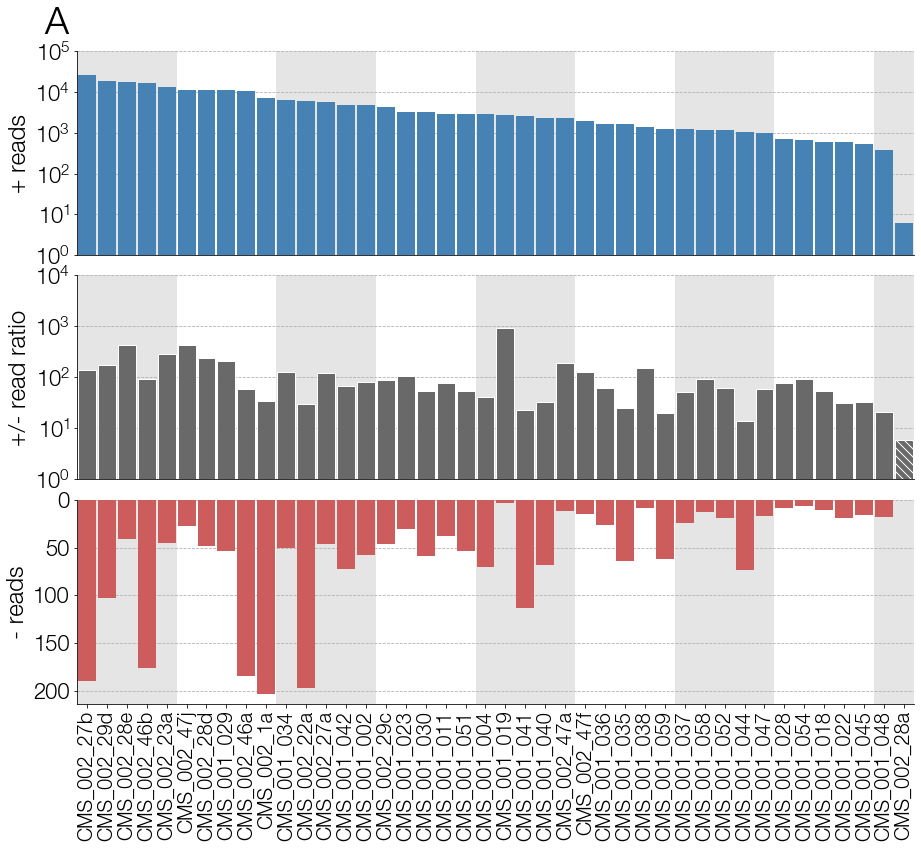

Robin
42


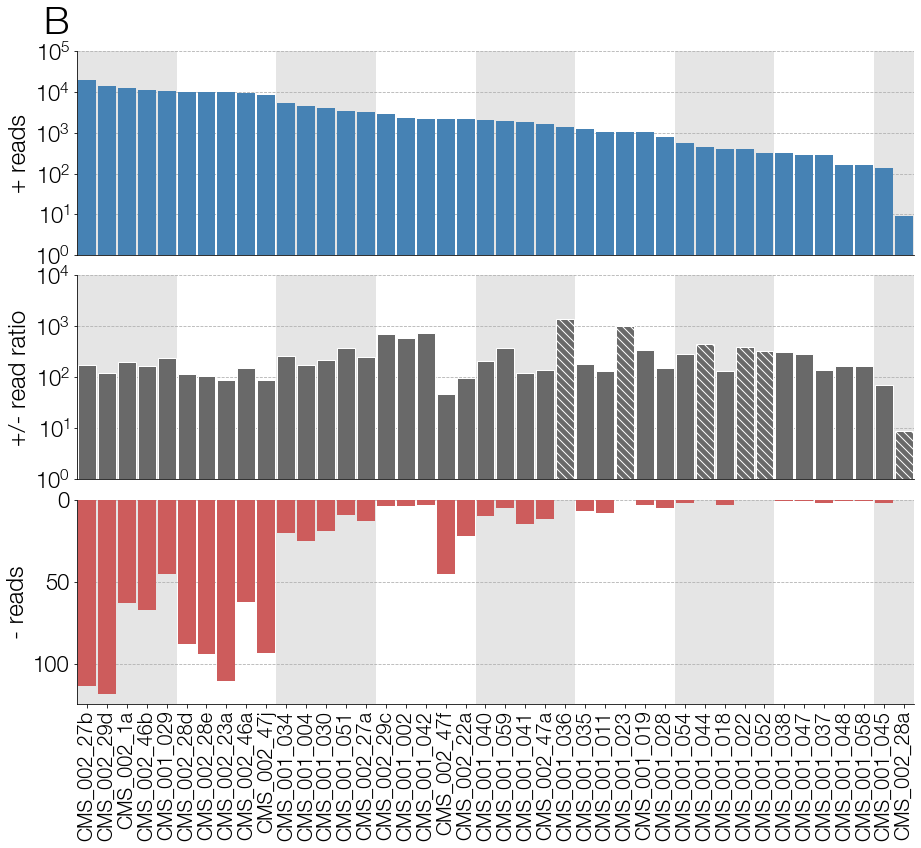

In [3]:

for seg in directions:
    print(seg)
    
    plus_reads={x: min([directions[seg][x][(True,True)],directions[seg][x][(False,False)]]) for x in directions[seg]}
    minus_reads={x: min([directions[seg][x][(False,True)],directions[seg][x][(True,False)]]) for x in directions[seg]}
    
    shared=set(directions['RdRp']).intersection(set(directions['Robin']))
    sorted_samples=sorted(shared,key=lambda k: (-plus_reads[k],-plus_reads[k]+minus_reads[k]))
    print(len(sorted_samples))
    
    fig = plt.subplots(figsize=(15,12),facecolor='w')
    gs = GridSpec(3,1,hspace=0.1,wspace=0.01,height_ratios=[1,1,1])
    ax=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])

    for s,S in enumerate(sorted_samples):
        ax.bar(s,plus_reads[S],facecolor='steelblue',edgecolor='none',lw=1,width=0.9,zorder=100)
        ax3.bar(s,minus_reads[S],facecolor='indianred',edgecolor='none',lw=1,width=0.9,zorder=100)
        
        ratio=plus_reads[S]/minus_reads[S] if minus_reads[S]>0 else np.nan
        hatch=''
        fc='dimgrey'
        if np.isnan(ratio):
            ratio=plus_reads[S]
            hatch='\\\\\\'
#             fc='k'
            
        ax2.bar(s,ratio,facecolor=fc,edgecolor='w',lw=1,hatch=hatch,width=0.9,zorder=100)
        
    ax.set_ylim(1,100000)
    ax2.set_ylim(1,10000)
    ax.set_yscale('log')
    ax2.set_yscale('log')
    
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=7))
    ax2.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=6))
    ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
    
    ax.grid(axis='y',ls='--',zorder=0)
    ax2.grid(axis='y',ls='--',zorder=0)
    ax3.grid(axis='y',ls='--',zorder=0)
    # ax2.set_ylim(ax.get_ylim())

    ax.set_ylabel('+ reads',size=24)
    ax2.set_ylabel('+/- read ratio',size=24)
    ax3.set_ylabel('- reads',size=24)
    ax3.invert_yaxis()

    [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom','left']]
    [ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in ['bottom','left']]
    [ax3.spines[loc].set_visible(False) for loc in ax3.spines if loc not in ['bottom','left']]
    
    ax.tick_params(axis='x',size=0)
    ax2.tick_params(axis='x',size=0)
    
    ax.set_xticklabels([])
    ax2.set_xticklabels([])
    
    ax3.set_xticklabels(sorted_samples,rotation=90,size=20)
    ax3.set_xlim(-0.5,len(sorted_samples)-0.5)
    
    ax.set_xlim(ax3.get_xlim())
    ax2.set_xlim(ax3.get_xlim())
    
    ax3.set_xticks(range(len(sorted_samples)))
    
    [ax.axvspan(x-0.5,x+4.5,facecolor='k',edgecolor='none',zorder=0,alpha=0.1) for x in range(0,len(sorted_samples),10)]
    [ax2.axvspan(x-0.5,x+4.5,facecolor='k',edgecolor='none',zorder=0,alpha=0.1) for x in range(0,len(sorted_samples),10)]
    [ax3.axvspan(x-0.5,x+4.5,facecolor='k',edgecolor='none',zorder=0,alpha=0.1) for x in range(0,len(sorted_samples),10)]
    
    
    ax.text(-0.01,1.05,'A' if seg=='RdRp' else 'B',size=38,ha='right',va='bottom',transform=ax.transAxes)
    plt.savefig('/Users/evogytis/Documents/manuscripts/narna-double-synonyms/figures/CulexNarnavirus1_%s_reads.png'%(seg),dpi=300,bbox_inches='tight')
    
    plt.show()

In [4]:
print(sorted(sorted_samples))

['CMS_001_002', 'CMS_001_004', 'CMS_001_011', 'CMS_001_018', 'CMS_001_019', 'CMS_001_022', 'CMS_001_023', 'CMS_001_028', 'CMS_001_029', 'CMS_001_030', 'CMS_001_034', 'CMS_001_035', 'CMS_001_036', 'CMS_001_037', 'CMS_001_038', 'CMS_001_040', 'CMS_001_041', 'CMS_001_042', 'CMS_001_044', 'CMS_001_045', 'CMS_001_047', 'CMS_001_048', 'CMS_001_051', 'CMS_001_052', 'CMS_001_054', 'CMS_001_058', 'CMS_001_059', 'CMS_002_1a', 'CMS_002_22a', 'CMS_002_23a', 'CMS_002_27a', 'CMS_002_27b', 'CMS_002_28a', 'CMS_002_28d', 'CMS_002_28e', 'CMS_002_29c', 'CMS_002_29d', 'CMS_002_46a', 'CMS_002_46b', 'CMS_002_47a', 'CMS_002_47f', 'CMS_002_47j']


In [5]:
# %%bash

# # minimap2 -ax sr RdRp.fasta $sampleread1.fasta.gz read2.fasta.gz > RdRp_$sample.sam 
# base_path=/Users/evogytis/Documents/manuscripts/narna-double-synonyms/s3

# cd $base_path

# for sample in $base_path/*R1*.fastq.gz
#     do
    
#     s1=$(basename $sample) ## read 1
#     s2=${s1/_R1_/_R2_} ## read 2
    
#     arrIN=(${s1//_/ }) ## split filename
    
#     ## CMS001
#     out=marmaRdRp_CMS_001_${arrIN[1]}.sam ## format rdrp output
    
    
#     ## CMS002
# #     rdrp_out=RdRp_CMS_${arrIN[1]}_${arrIN[2]}.sam ## format rdrp output
# #     robin_out=Robin_CMS_${arrIN[1]}_${arrIN[2]}.sam ## format robin output
    
    
# #     echo $base_path/$rdrp_out
# #     echo $base_path/$robin_out
    
#     echo "minimap2 -ax sr --sam-hit-only marmaRdRp.fasta $s1 $s2 > $base_path/$out"
    
# done;

In [6]:
# base_path='/Users/evogytis/Documents/manuscripts/narna-double-synonyms/s3/'

# counter=1
# directions={}
# for fname in glob.glob(os.path.join(base_path,'marmaRdRp*.sam')):
# #     print(fname)
#     if os.stat(fname).st_size>10000:
# #         print(counter,fname,os.stat(fname).st_size)
        
        
#         sample='_'.join(os.path.basename(fname).split('.')[0].split('_')[1:])
        
#         samfile = pysam.AlignmentFile(fname, "r")
        
#         dirs=[]
#         for entry in samfile:
# #             print(entry.is_read1,entry.is_reverse)
#             dirs.append((entry.is_read1,entry.is_reverse))
        
# #         if len(dirs)>10:
#         if len(dirs)>100:
            
#             print(counter,sample)
#             counter+=1

#             directions[sample]=Counter(dirs)
# #             print(Counter(dirs))
# print(directions)